In [1]:
from basin_volume import *

/home/adam/.conda/envs/jax311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import os

In [5]:
results_dir = os.path.join(BASIN_VOLUME_DIR, "results")

In [14]:
# ls results_dir chronologically
os.listdir(results_dir)


['convnext_kl_basins.pkl',
 'pythia_high_cutoff_adam_20_10.pkl',
 'pythia_31m_chkpts_32_1.pkl',
 'pythia_low_cutoff_adam_20_10.pkl',
 'pythia_31m_chkpts_overnight_10_500.pkl',
 'pythia_31m_chkpts_30_1.pkl',
 '31m_cutoff_scan.pkl',
 'pythia_31m_final_test.pkl',
 'pythia_31m_chkpts_10_10.pkl',
 'pythia_31m_chkpts_test.pkl',
 '31m_checkpoint_scan.pkl',
 'pythia_overnight_cutoff_32_100.pkl',
 'pythia_overnight_adam_10_500.pkl',
 'pythia_overnight_cutoff_adam_20_100.pkl']

In [7]:
import pickle

# cutoff scans

In [11]:
with open(os.path.join(results_dir, "pythia_overnight_cutoff_adam_20_100.pkl"), "rb") as f:
    results_adam, cfg = pickle.load(f)


with open(os.path.join(results_dir, "pythia_overnight_cutoff_32_100.pkl"), "rb") as f:
    results_no_adam, cfg = pickle.load(f)



In [9]:
pythia_31m_model = load_pythia_checkpoint("143000", "31m")
model_dim = torch.nn.utils.parameters_to_vector(pythia_31m_model.parameters()).shape[0]

The `GPTNeoXSdpaAttention` class is deprecated in favor of simply modifying the `config._attn_implementation`attribute of the `GPTNeoXAttention` class! It will be removed in v4.48


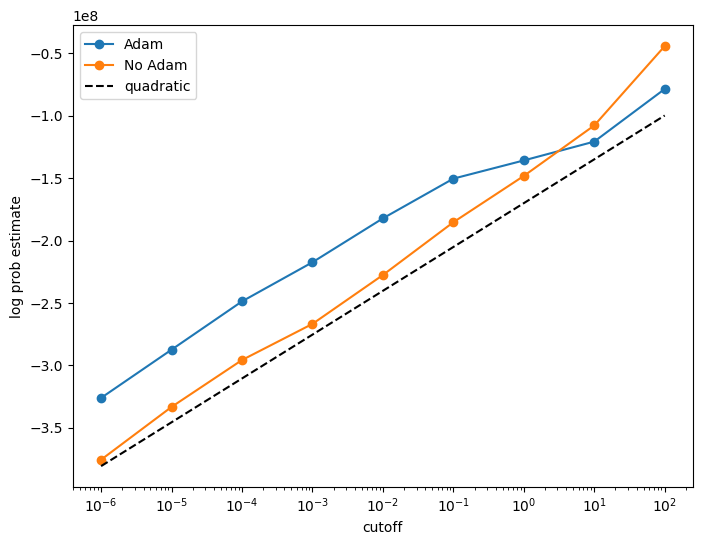

In [12]:
plt.figure(figsize=(8, 6))
maxes_adam = [result.estimates.max() for result in results_adam.values()]
plt.plot(list(results_adam.keys()), maxes_adam, 'o-', label="Adam")

maxes_no_adam = [result.estimates.max() for result in results_no_adam.values()]
plt.plot(list(results_no_adam.keys()), maxes_no_adam, 'o-', label="No Adam")

plt.xlabel("cutoff")
plt.ylabel("log prob estimate")
plt.xscale("log")
# line with slope model_dim/2
plt.plot(list(results_adam.keys()), 
         [model_dim/2 * np.log(cutoff) - 1.7e8 for cutoff in results_adam.keys()], 
         '--', color="black", 
         label="quadratic")
plt.legend()
plt.show()

# epsilon scans

In [15]:
with open(os.path.join(results_dir, "pythia_high_cutoff_adam_20_10.pkl"), "rb") as f:
    results_high_cutoff_adam, cfg = pickle.load(f)

with open(os.path.join(results_dir, "pythia_low_cutoff_adam_20_10.pkl"), "rb") as f:
    results_low_cutoff_adam, cfg = pickle.load(f)

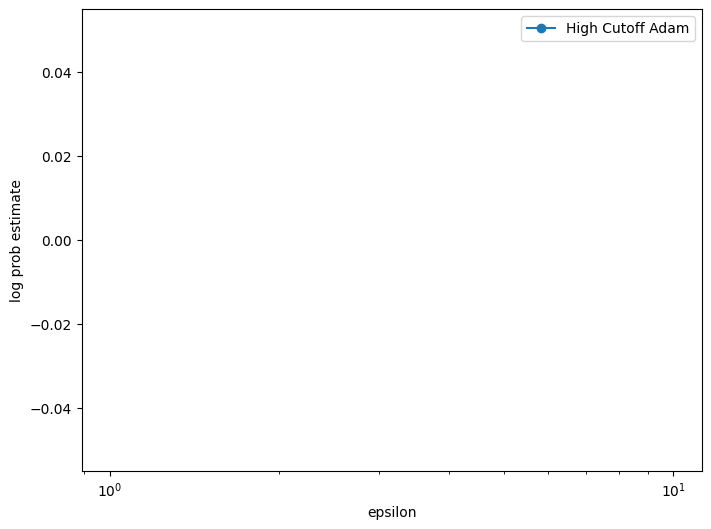

In [18]:

plt.figure(figsize=(8, 6))
maxes_high_cutoff_adam = [result.estimates.max() for result in results_high_cutoff_adam.values()]
plt.plot(list(results_high_cutoff_adam.keys()), maxes_high_cutoff_adam, 'o-', label="High Cutoff Adam")

maxes_low_cutoff_adam = [result.estimates.max() for result in results_low_cutoff_adam.values()]
plt.plot(list(results_low_cutoff_adam.keys()), maxes_low_cutoff_adam, 'o-', label="Low Cutoff Adam")

plt.xlabel("epsilon")
plt.ylabel("log prob estimate")
plt.xscale("log")
plt.legend()
plt.show()